# **Pretraining? why?**

 **Install dependencies and fix seed**

In [ ]:
import os

if not os.path.isfile("requirements.txt"):
    print("requirements.txt is missing")
else:
    !pip install -r requirements.txt

Data available in requirements.txt (see the picture below).

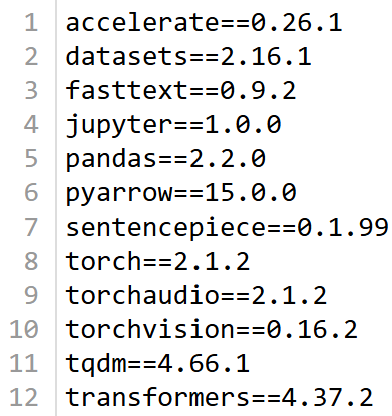

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#It suppresses all warnings to keep the output clean,
#preventing non-critical messages from cluttering the console.

In [ ]:
import torch

def fix_torch_seed(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

fix_torch_seed()

**Load a general pretrained model**

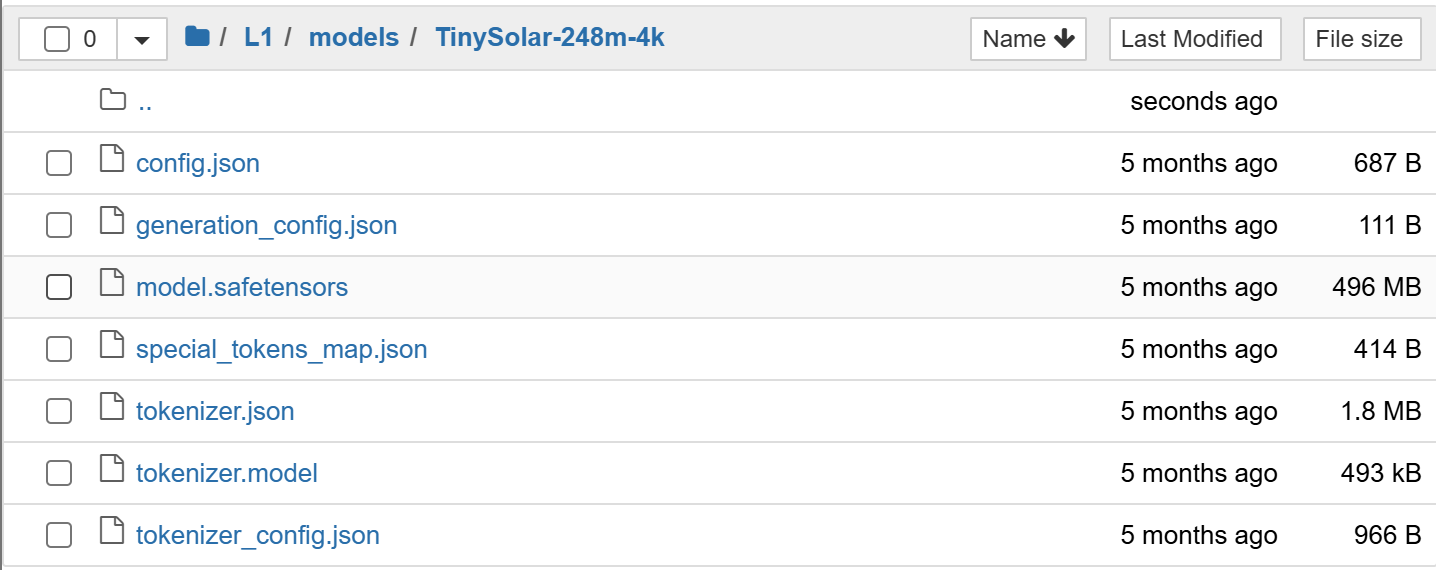

we upload the files,

config.json – Defines the model architecture (e.g., layer sizes, hidden states). Essential for loading the model correctly.

generation_config.json – Stores settings for text generation (e.g., temperature, top-k sampling). Needed for controlling model output.

model.safetensors – Contains the actual trained model weights. Required for inference and fine-tuning.

special_tokens_map.json – Maps special tokens (e.g., <pad>, <unk>). Ensures correct token handling.

tokenizer.json – Defines the tokenizer rules and vocabulary. Needed for encoding/decoding text.

tokenizer.model – The pre-trained tokenizer model file. Required for converting text into model-readable format.

tokenizer_config.json – Configuration for the tokenizer (e.g., type, normalization). Helps in consistent tokenization.

These files are necessary to ensure the model loads properly and functions correctly in the code environment.

**TinySolar-248m-4k is a small decoder-only model with 248M parameters (similar in scale to GPT2) and a 4096 token context window. You can find the model on the Hugging Face model library at this link.**

You'll load the model in three steps:

Specify the path to the model in the Hugging Face model library

Load the model using AutoModelforCausalLM in the transformers library

Load the tokenizer for the model from the same model path

In [ ]:
model_path_or_name = "./models/TinySolar-248m-4k"

**AutoModelForCausalLM.from_pretrained**
from Hugging face transformer's library.

this training script in Python will read these JSON files to configure and load the model.

In [ ]:
from transformers import AutoModelForCausalLM
tiny_general_model = AutoModelForCausalLM.from_pretrained(
    model_path_or_name,
    device_map="cpu", # change to auto if you have access to a GPU
    torch_dtype=torch.bfloat16
)

NameError: name 'model_path_or_name' is not defined

In [ ]:
from transformers import AutoTokenizer
tiny_general_tokenizer = AutoTokenizer.from_pretrained(
    model_path_or_name
)

 **Generate text samples**

Here you'll try generating some text with the model. You'll set a prompt, instantiate a text streamer, and then have the model complete the prompt:

In [ ]:
prompt = "I am an engineer. I love"

In [ ]:
inputs = tiny_general_tokenizer(prompt, return_tensors="pt")

NameError: name 'tiny_general_tokenizer' is not defined

In [ ]:
from transformers import TextStreamer
streamer = TextStreamer(
    tiny_general_tokenizer,
    skip_prompt=True, # If you set to false, the model will first return the prompt and then the generated text
    skip_special_tokens=True
)

In [ ]:
outputs = tiny_general_model.generate(
    **inputs,
    streamer=streamer,
    use_cache=True,
    max_new_tokens=128,
    do_sample=False,
    temperature=0.0,
    repetition_penalty=1.1
)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


to work with people and I like to be a part of the team.
I have been working in the field of engineering for over 10 years now. I have worked in the field of electrical engineering since 2003, and I have always wanted to work in the field of electrical engineering.
I have been involved in the field of electrical engineering since 2005. I have been involved in the field of electrical engineering since 2008. I have also been involved in the field of electrical engineering since 2014.
I have been involved in the field of electrical engineering since


 **Generate Python samples with pretrained general model**

In [ ]:
prompt =  "def find_max(numbers):"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
inputs = tiny_general_tokenizer(
    prompt, return_tensors="pt"
).to(tiny_general_model.device)

streamer = TextStreamer(
    tiny_general_tokenizer,
    skip_prompt=True, # Set to false to include the prompt in the output
    skip_special_tokens=True
)

NameError: name 'tiny_general_tokenizer' is not defined

In [ ]:
outputs = tiny_general_model.generate(
    **inputs,
    streamer=streamer,
    use_cache=True,
    max_new_tokens=128,
    do_sample=False,
    temperature=0.0,
    repetition_penalty=1.1
)

**Generate Python samples with finetuned Python model**

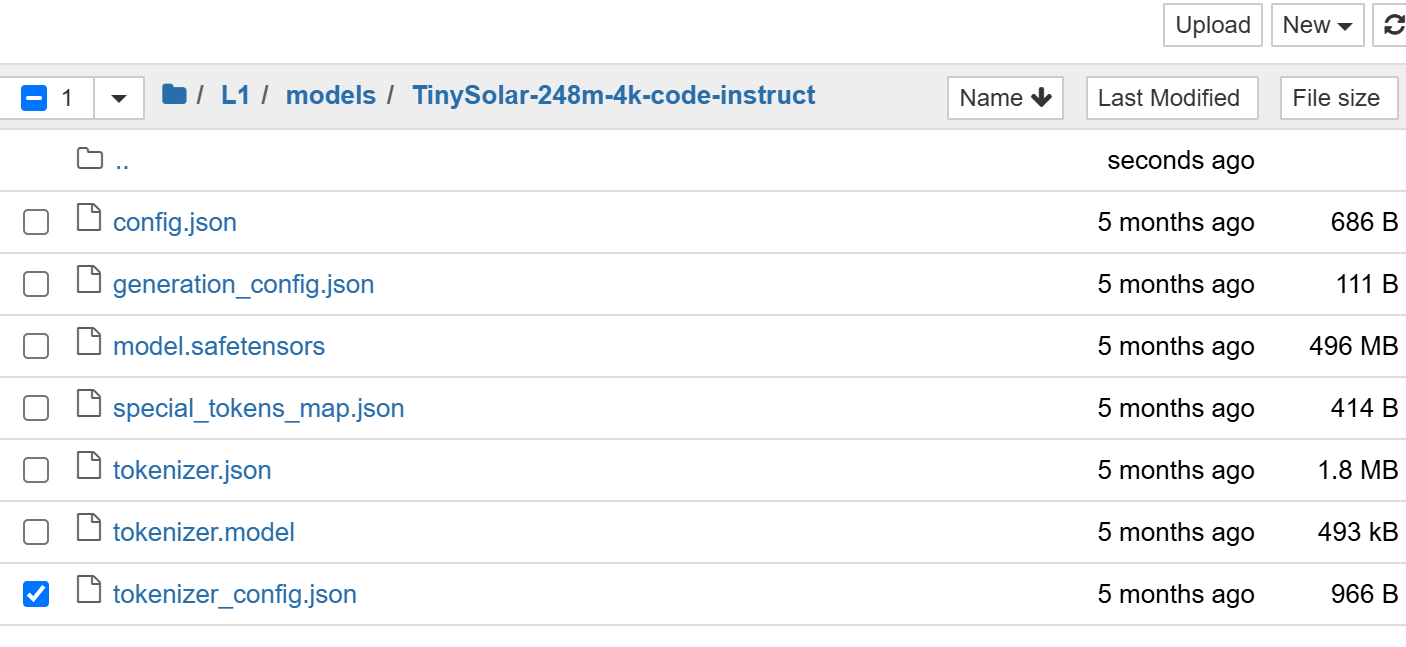


This model has been fine-tuned on instruction code examples. You can find the model and information about the fine-tuning datasets on the Hugging Face model library at this link.

In [ ]:
model_path_or_name = "./models/TinySolar-248m-4k-code-instruct"

In [ ]:
tiny_finetuned_model = AutoModelForCausalLM.from_pretrained(
    model_path_or_name,
    device_map="cpu",
    torch_dtype=torch.bfloat16,
)

tiny_finetuned_tokenizer = AutoTokenizer.from_pretrained(
    model_path_or_name
)

In [ ]:
prompt =  "def find_max(numbers):"

inputs = tiny_finetuned_tokenizer(
    prompt, return_tensors="pt"
).to(tiny_finetuned_model.device)

streamer = TextStreamer(
    tiny_finetuned_tokenizer,
    skip_prompt=True,
    skip_special_tokens=True
)

outputs = tiny_finetuned_model.generate(
    **inputs,
    streamer=streamer,
    use_cache=True,
    max_new_tokens=128,
    do_sample=False,
    temperature=0.0,
    repetition_penalty=1.1
)

**Generate Python samples with pretrained Python model**

a version of TinySolar-248m-4k that has been further pretrained (a process called continued pretraining) on a large selection of python code samples. You can find the model on Hugging Face at this link.

In [ ]:
model_path_or_name = "./models/TinySolar-248m-4k-py"

In [ ]:
tiny_custom_model = AutoModelForCausalLM.from_pretrained(
    model_path_or_name,
    device_map="cpu",
    torch_dtype=torch.bfloat16,
)

tiny_custom_tokenizer = AutoTokenizer.from_pretrained(
    model_path_or_name
)

In [ ]:
prompt = "def find_max(numbers):"

inputs = tiny_custom_tokenizer(
    prompt, return_tensors="pt"
).to(tiny_custom_model.device)

streamer = TextStreamer(
    tiny_custom_tokenizer,
    skip_prompt=True,
    skip_special_tokens=True
)

outputs = tiny_custom_model.generate(
    **inputs, streamer=streamer,
    use_cache=True,
    max_new_tokens=128,
    do_sample=False,
    repetition_penalty=1.1
)

# **Data Preparation**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

**Sourcing datasets for pretraining**

we load a pretraining dataset from Hugging Face, a subset of a much larger dataset called Red Pajama.

datasets library belongs to hugging face

In [ ]:
!pip install datasets

In [ ]:
import datasets
pretraining_dataset = datasets.load_dataset(
    "upstage/Pretraining_Dataset",
    split="train"
)

#The argument split="train"
#specifies that only the training portion of the dataset should be loaded.

pretraining_dataset.parquet:   0%|          | 0.00/150M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/60000 [00:00<?, ? examples/s]

The dataset is stored in Parquet format (a compressed, columnar data format).

The file size is 150MB, and it was downloaded at 84.4MB/s, completing in 1 second.

The dataset contains 60,000 training examples.

It was processed (loaded into memory) in 5 seconds, at a rate of 5,570.97 examples per second.

In [ ]:
print(pretraining_dataset)

Dataset({
    features: ['text', 'meta'],
    num_rows: 60000
})


In [ ]:
pretraining_dataset = pretraining_dataset.select_columns(["text"])

#only work with the text column

In [ ]:
print(pretraining_dataset[0]["text"][:300])

#sample

In 1793 Zaman Shah, a grandson of Ahmad Shah Durrani, won a brief war of succession to become ruler of Afghanistan. The support of Painda Khan, chief of the Baraksai branch of the Durrani tribe, was decisive in his victory. In the next fifty year., the brothers of Zaman shah and the sons of Painda K


**Compare pretraining and fine-tuning datasets**

we now download a fine-tuning dataset to contrast with the pretraining dataset you loaded above.

In [ ]:
instruction_dataset = datasets.load_dataset(
    "c-s-ale/alpaca-gpt4-data",
    split='train'
)
print(instruction_dataset)

README.md:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

alpaca_gpt4_data.json:   0%|          | 0.00/43.4M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/52002 [00:00<?, ? examples/s]

Dataset({
    features: ['instruction', 'input', 'output'],
    num_rows: 52002
})


A README.md file is a Markdown document used for project or dataset descriptions. It provides usage instructions, features, and guidelines

In [ ]:
i=0
print("Instruction: " + instruction_dataset[i]["instruction"]
      + "\nInput: " + instruction_dataset[i]["input"]
      + "\nOutput: " + instruction_dataset[i]["output"])

Instruction: Give three tips for staying healthy.
Input: 
Output: 1. Eat a balanced and nutritious diet: Make sure your meals are inclusive of a variety of fruits and vegetables, lean protein, whole grains, and healthy fats. This helps to provide your body with the essential nutrients to function at its best and can help prevent chronic diseases.

2. Engage in regular physical activity: Exercise is crucial for maintaining strong bones, muscles, and cardiovascular health. Aim for at least 150 minutes of moderate aerobic exercise or 75 minutes of vigorous exercise each week.

3. Get enough sleep: Getting enough quality sleep is crucial for physical and mental well-being. It helps to regulate mood, improve cognitive function, and supports healthy growth and immune function. Aim for 7-9 hours of sleep each night.


Notice how in contrast to the pretraining data, which is just raw text, fine-tuning datasets are structured into question-answer pairs or instruction-response sets that can include additional input context if required.

Moving forward, you'll only work with the unstructured pretraining dataset.

**Scrape python code from Github**

you'll download a selection of python scripts from Github and then prepare them as a Hugging Face Dataset object to use in training

In [ ]:
# Import some required packages
import os
import requests
os.makedirs(code_dir, exist_ok=True)

# Path to directory to store python scripts
code_dir = "./code"


In [ ]:
urls = [
    "https://raw.githubusercontent.com/TheAlgorithms/Python/master/searches/double_linear_search_recursion.py",
    "https://raw.githubusercontent.com/KosingZhu/tensorflow/master/tensorflow/python/tools/module_util.py",
    "https://raw.githubusercontent.com/EricRemmerswaal/tensorflow/master/tensorflow/python/distribute/distribute_coordinator_context.py",
    "https://raw.githubusercontent.com/computationalartist/tensorflow/master/tensorflow/python/ops/numpy_ops/integration_test/benchmarks/numpy_mlp.py",
    "https://raw.githubusercontent.com/Van-an/tensorflow/master/tensorflow/python/distribute/coordinator/values.py",
    "https://raw.githubusercontent.com/nkgwer/tensorflow/master/tensorflow/lite/tools/visualize.py",
    "https://raw.githubusercontent.com/gitblazer/youtube-dl/master/youtube_dl/version.py",
    "https://raw.githubusercontent.com/Joshua-Barawa/My-Photos/master/venv/lib/python3.8/site-packages/django/contrib/messages/__init__.py",
    "https://raw.githubusercontent.com/PaliC/pytorch/master/test/fx/test_subgraph_rewriter.py"
]

Retrieve the python scripts:

In [ ]:
for url in urls:
    print(f"Working on url: {url}")
    response = requests.get(url)
    file_name = os.path.basename(url)
    file_path = os.path.join(code_dir, file_name)

    with open(file_path, "wb") as file:
        file.write(response.content)

Working on url: https://raw.githubusercontent.com/TheAlgorithms/Python/master/searches/double_linear_search_recursion.py
Working on url: https://raw.githubusercontent.com/KosingZhu/tensorflow/master/tensorflow/python/tools/module_util.py
Working on url: https://raw.githubusercontent.com/EricRemmerswaal/tensorflow/master/tensorflow/python/distribute/distribute_coordinator_context.py
Working on url: https://raw.githubusercontent.com/computationalartist/tensorflow/master/tensorflow/python/ops/numpy_ops/integration_test/benchmarks/numpy_mlp.py
Working on url: https://raw.githubusercontent.com/Van-an/tensorflow/master/tensorflow/python/distribute/coordinator/values.py
Working on url: https://raw.githubusercontent.com/nkgwer/tensorflow/master/tensorflow/lite/tools/visualize.py
Working on url: https://raw.githubusercontent.com/gitblazer/youtube-dl/master/youtube_dl/version.py
Working on url: https://raw.githubusercontent.com/Joshua-Barawa/My-Photos/master/venv/lib/python3.8/site-packages/djan

In [ ]:
files = os.listdir(code_dir)
for file in files:
    print(file)

test_subgraph_rewriter.py
values.py
numpy_mlp.py
distribute_coordinator_context.py
double_linear_search_recursion.py
__init__.py
module_util.py
version.py
visualize.py


Concatenate scripts into a list:

In [ ]:
code_dataset = []
for file in os.listdir(code_dir):
    code_dataset.append(
        {'text': open(os.path.join(code_dir, file), 'r').read()}
    )

Convert list to Hugging Face Dataset object:

In [ ]:
code_dataset = datasets.Dataset.from_list(code_dataset)
print(code_dataset)

Dataset({
    features: ['text'],
    num_rows: 9
})


Combine the python code dataset with the pretraining dataset you downloaded above:

In [ ]:
dataset = datasets.concatenate_datasets(
    [pretraining_dataset, code_dataset]
)
print(dataset)

Dataset({
    features: ['text'],
    num_rows: 60009
})


**Data cleaning**

In the cells below, you'll carry out the following cleaning steps:

Filter out samples that are too short

Remove repetitions within a single text example

Remove duplicated documents

Quality filter to remove non-English texts

In [ ]:
dataset.num_rows

60009

**Remove examples that are too short**

In [ ]:
import heapq

def paragraph_length_filter(x):
    """Returns False iff a page has too few lines or lines are too short."""
    lines = x['text'].split('\n')
    if (
        len(lines) < 3
        or min(heapq.nlargest(3, [len(line) for line in lines])) < 3
    ):
        return False
    return True

In [ ]:
dataset = dataset.filter(
    paragraph_length_filter,
    load_from_cache_file=False
)

Filter:   0%|          | 0/60009 [00:00<?, ? examples/s]

In [ ]:
dataset.num_rows

52356

**Remove repeated text within training examples**

In [ ]:
def find_duplicates(paragraphs):
    """
    Use this function to find the number of repetitions
    in the paragraphs.
    """
    unique_x = set()
    duplicate_chars = 0
    duplicate_elements = 0
    for element in paragraphs:
        if element in unique_x:
            duplicate_chars += len(element)
            duplicate_elements += 1
        else:
            unique_x.add(element)
    return duplicate_elements, duplicate_chars

In [ ]:
import re

def paragraph_repetition_filter(x):
    """
    Returns False iff a page has too many repetitions.
    """
    text = x['text']
    paragraphs = re.compile(r"\n{2,}").split(text.strip())                # Split by paragraphs (2 or more newlines)
    paragraphs_duplicates, char_duplicates = find_duplicates(paragraphs)  # Find number of duplicates in paragraphs
    if paragraphs_duplicates / len(paragraphs) > 0.3:
        return False
    if char_duplicates / len(text) > 0.2:
        return False
    return True

In [ ]:
dataset = dataset.filter(
    paragraph_repetition_filter,
    load_from_cache_file=False
)

Filter:   0%|          | 0/52356 [00:00<?, ? examples/s]

In [ ]:
dataset.num_rows

52326

**Deduplication**

In [ ]:
def deduplication(ds):
    def dedup_func(x):
        """Use this function to remove duplicate entries"""
        if x['text'] in unique_text:
            return False
        else:
            unique_text.add(x['text'])
            return True

    unique_text = set()

    ds = ds.filter(dedup_func, load_from_cache_file=False, num_proc=1)
    return ds

dataset = deduplication(dataset)

Filter:   0%|          | 0/52326 [00:00<?, ? examples/s]

In [ ]:
dataset.num_rows

43597

**Quality filter - Language**

 you'll remove any text examples that are in a language other than English. The code here uses a language detection model called fastText.

In [ ]:
!pip install fasttext

In [ ]:
pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 23.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray 2025.1.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.23.5

In [ ]:
from langdetect import detect

def english_language_filter(ds):
    def is_english(text):
        return detect(text) == 'en'

    ds = ds.filter(is_english, load_from_cache_file=False, num_proc=1)
    return ds

dataset = english_language_filter(dataset)


In [ ]:
import urllib
from fasttext.FastText import _FastText

def english_language_filter(ds):
    # load language detection model
    model = _FastText('./models/upstage/L2_language_model.bin')

    def is_english(x):
        # Predict language of the text and probability
        language, score = model.predict(x['text'].replace("\n", ""))

        language = language[0].split("__")[2]
        return score > 0.4 and language == "en" # change code here if building a model in another language

    ds = ds.filter(is_english, load_from_cache_file=False, num_proc=1)
    return ds

dataset = english_language_filter(dataset)

Filter:   0%|          | 0/4360 [00:00<?, ? examples/s]

ValueError: Unable to avoid copy while creating an array as requested.
If using `np.array(obj, copy=False)` replace it with `np.asarray(obj)` to allow a copy when needed (no behavior change in NumPy 1.x).
For more details, see https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword.

In [ ]:
dataset.num_rows

4360

**Save the dataset to disk**

In [ ]:
file_path = "./data/preprocessed_dataset.parquet"
dataset.to_parquet(file_path)

# **Data Packaging**

**Tokenizing and creating input_ids**

we load the dataset from the previous lesson

In [ ]:
import datasets

dataset = datasets.load_dataset(
    "parquet",
    data_files="./data/preprocessed_dataset.parquet",
    split="train"
)
print(dataset)

Use the shard method of the Hugging Face Dataset object to split the dataset into 10 smaller pieces, or shards (think shards of broken glass).

In [ ]:
dataset = dataset.shard(num_shards=10, index=0)
print(dataset)

Dataset({
    features: ['text'],
    num_rows: 4360
})


Load the tokenizer and try it out:

In [ ]:
from transformers import AutoTokenizer
model_path_or_name = "./models/SOLAR-10.7B-v1.0"
tokenizer = AutoTokenizer.from_pretrained(
    model_path_or_name,
    use_fast=False
)

In [ ]:
tokenizer.tokenize("I'm a short sentence")

Create a helper function:

In [ ]:
def tokenization(example):
    # Tokenize
    tokens = tokenizer.tokenize(example["text"])

    # Convert tokens to ids
    token_ids = tokenizer.convert_tokens_to_ids(tokens)

    # Add <bos>, <eos> tokens to the front and back of tokens_ids
    # bos: begin of sequence, eos: end of sequence
    token_ids = [
        tokenizer.bos_token_id] \
        + token_ids \
        + [tokenizer.eos_token_id
    ]
    example["input_ids"] = token_ids

    # We will be using this column to count the total number of tokens
    # in the final dataset
    example["num_tokens"] = len(token_ids)
    return example

Tokenize all the examples in the pretraining dataset:

In [ ]:
dataset = dataset.map(tokenization, load_from_cache_file=False)
print(dataset)

In [ ]:
sample = dataset[3]

print("text", sample["text"][:30]) #
print("\ninput_ids", sample["input_ids"][:30])
print("\nnum_tokens", sample["num_tokens"])

Check the total number of tokens in the dataset:

In [ ]:
import numpy as np
np.sum(dataset["num_tokens"])

**Packing the data**

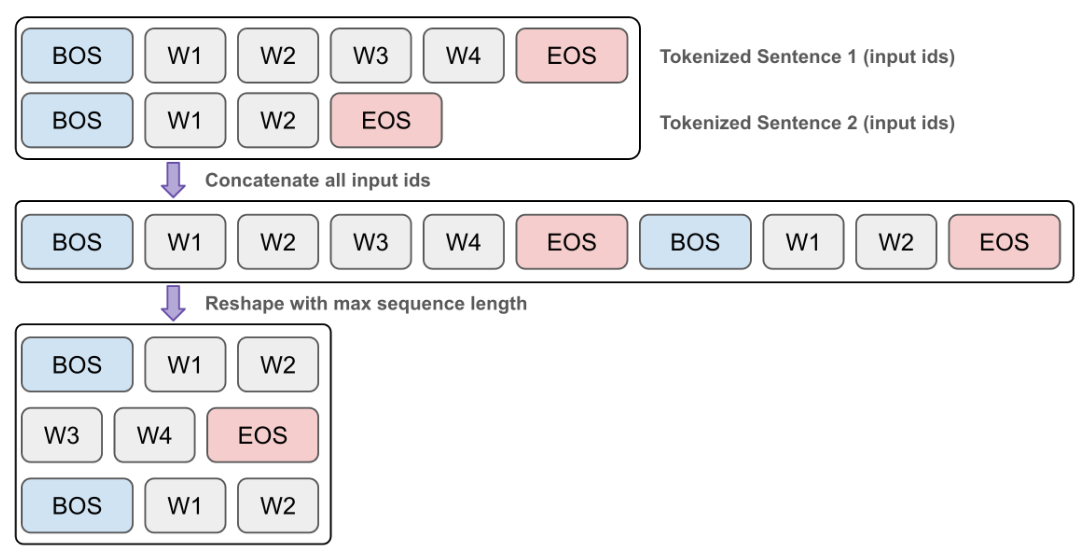

Concatenate input_ids for all examples into a single list:

In [ ]:
input_ids = np.concatenate(dataset["input_ids"])
print(len(input_ids))

In [ ]:
max_seq_length = 32

In [ ]:
total_length = len(input_ids) - len(input_ids) % max_seq_length
print(total_length)

Discard extra tokens from end of the list so number of tokens is exactly divisible by max_seq_length:

In [ ]:
input_ids = input_ids[:total_length]
print(input_ids.shape)

In [ ]:
input_ids_reshaped = input_ids.reshape(-1, max_seq_length).astype(np.int32)
input_ids_reshaped.shape

In [ ]:
type(input_ids_reshaped)

Convert to Hugging Face dataset:

In [ ]:
input_ids_list = input_ids_reshaped.tolist()
packaged_pretrain_dataset = datasets.Dataset.from_dict(
    {"input_ids": input_ids_list}
)
print(packaged_pretrain_dataset)

Save the packed dataset to disk

In [ ]:
packaged_pretrain_dataset.to_parquet("./data/packaged_pretrain_dataset.parquet")

# **Preparing the model for training**

In [ ]:
# Ignore insignificant warnings (ex: deprecation warnings)
import warnings
warnings.filterwarnings('ignore')

# Set a seed value for reproducibility
import torch

def fix_torch_seed(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

fix_torch_seed()

**Model configuration**

You'll configure models based on Meta's Llama family of models. The transformers library has several tools for working with these models, which you can read about here.

Start by creating a LlamaConfig object to configure the architecture of the model:

In [ ]:
from transformers import LlamaConfig
config = LlamaConfig()
print(config)

Next, update parameters to change the model architecture:

In [ ]:
config.num_hidden_layers = 12      # reduced from 32 to 12
config.hidden_size = 1024          # reduced 1/4 from 4096 to 1024
config.intermediate_size = 4096    # reduced 1/3 from 11008 to 4096 (dimension of MLP representations)
config.num_key_value_heads = 8     # reduced 1/4 from 32 to 8 (defaults to num_attention_heads=32)
config.torch_dtype = "bfloat16"    # for half-precision training
config.use_cache = False           # `True` is incompatible w/ gradient checkpointing
print(config)

**Weight initialization**

you'll explore four different ways to initialize the weights of a model for training:

Random weight initialization

Using an existing model for continued pre-training

Downscaling an existing model

Upscaling an existing model

**Random weight initialization**

Randomly initializing model weights sets all weights to values from a truncated normal distribution with mean 0 and standard deviation of 0.02. Values beyond 2-sigma from the mean are set to 0.

In [ ]:
from transformers import LlamaForCausalLM
model = LlamaForCausalLM(config)
print(model)

In [ ]:
def print_nparams(model):
    """Calculate the total number of model parameters"""
    nparams = sum(p.numel() for p in model.parameters())
    print(f"The total number of parameters is: {nparams}")

print_nparams(model)  # 248013824 => 248M

Take a look at a sample of the weights in a single layer:

In [ ]:
layer_name = "model.layers.0.self_attn.q_proj.weight"

for name, param in model.named_parameters():
    if name == layer_name:
        print(f"First 30 weights of layer '{layer_name}':")
        print(param.data.view(-1)[:30])
        break

Try using the model for inference:

In [ ]:
# Load a tokenizer from Upstage Solar,
# which is compatible with the Llama-2 tokenizer
from transformers import LlamaTokenizer
model_dir = "./models/SOLAR-10.7B-v1.0"
tokenizer = LlamaTokenizer.from_pretrained(model_dir)

# Run simple inference with prompt
from transformers import TextStreamer

prompt = "I am an engineer. I love"

inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

streamer = TextStreamer(
    tokenizer,
    skip_prompt=True,
    skip_special_tokens=True
)

outputs = model.generate(
    **inputs,
    streamer=streamer,
    use_cache=True,
    max_new_tokens=128,
    do_sample=False
)

Remove the model from memory to avoid crashing the kernel

In [ ]:
# NOTE: We're running large models in a limited environment. Run me if you encounter any memory issues.
import gc
del model
del streamer
del outputs
gc.collect()

**Reuse general pretrained model weights**

If you load an existing model, you can use it as is to continue pretraining on new data.

In [ ]:
from transformers import AutoModelForCausalLM

model_name_or_path = "./models/TinySolar-248m-4k"
model = AutoModelForCausalLM.from_pretrained(
    model_name_or_path,
    device_map="cpu",
    torch_dtype=torch.bfloat16,
)

Remove the model from memory to avoid crashing the kernel:

In [ ]:
# NOTE: We're running large models in a limited environment. Run me if you encounter any memory issues.
del model
gc.collect()

**Downscaling from a general pretrained model**

Here you'll downscale the tinySolar-248m-4k model from a 12 layer model to a 10 layer model.

In [ ]:
from transformers import AutoTokenizer, AutoConfig

model_name_or_path = "./models/TinySolar-248m-4k"
model = AutoModelForCausalLM.from_pretrained(
    model_name_or_path,
    device_map="cpu",
    torch_dtype=torch.bfloat16,
)
tokenizer = AutoTokenizer.from_pretrained(model_name_or_path)

In [ ]:
print(model)

In [ ]:
print_nparams(model)  # 248013824 => 248M

Remove the middle two layers (layers 5 and 6) and update the configuration:

In [ ]:
layers = model.model.layers
model.model.layers = layers[:5] + layers[-5:]

config = AutoConfig.from_pretrained(
    model_name_or_path,
    num_hidden_layers=len(model.model.layers),
)
model.config = config

print_nparams(model)  # 217601024 => 217M

Clear the memory to avoid crashing the kernel:

In [ ]:
# NOTE: We're running large models in a limited environment. Run me if you encounter any memory issues.
import gc
del model
gc.collect()

**Depth Upscaling from a general pretrained model**

you are going to upscale the tinySolar-248m-4k model from 12 layers to 16 layers. Here are the steps you'll take:

Configure a 16 layer model and initialize it with random weights

Load the 12 layer tinySolar-248m-4k model into memory

Copy the bottom 8 and top 8 layers from the 12 layer model and use them to overwrite the random weights of the 16 layer model

Copy over the embedding and classifying layers to replace the randomly initialized counterparts in the 16 layer model

In [ ]:
config = LlamaConfig(
    num_hidden_layers=16,  # We want our model to have 16 final layers
    hidden_size=1024,
    intermediate_size=4096,
    num_attention_heads=32,
    num_key_value_heads=8,
    torch_dtype="bfloat16",
    use_cache=False
)
print(config)

In [ ]:
model = LlamaForCausalLM(config)
model = model.to(dtype=torch.bfloat16)  # convert to bfloat16
print_nparams(model)  # 308839424 => 308M

In [ ]:
model_name_or_path = "upstage/TinySolar-248m-4k"
pretrained_model = AutoModelForCausalLM.from_pretrained(
    model_name_or_path,
    device_map="cpu",
    torch_dtype=torch.bfloat16,
)
tokenizer = AutoTokenizer.from_pretrained(model_name_or_path)

print_nparams(pretrained_model) #  248013824 => 248M

In [ ]:
from copy import deepcopy

model.model.layers = deepcopy(pretrained_model.model.layers[:-4]) \
    + deepcopy(pretrained_model.model.layers[4:])

model.model.embed_tokens = deepcopy(pretrained_model.model.embed_tokens)

model.lm_head = deepcopy(pretrained_model.lm_head)

print(model.config)

Check the number of parameters is still 308 million:

In [ ]:
print_nparams(model)  # 308839424 => 308M

Try using the model for inference:

In [ ]:
# Run simple inference to show no trained model
prompt = "I am an engineer. I love"

inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

streamer = TextStreamer(
    tokenizer,
    skip_prompt=True,
    skip_special_tokens=True
)

outputs = model.generate(
    **inputs,
    streamer=streamer,
    use_cache=True,
    max_new_tokens=128,
    do_sample=False
)

**Save the model to disk**

Note the new model name here which reflects the 308 million parameters of the new, upscaled model.

In [ ]:
model.save_pretrained('./data/TinySolar-308m-4k-init')

# **Model training**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**Load the model to be trained**

Load the upscaled model from the previous lesson:

In [ ]:
import torch
from transformers import AutoModelForCausalLM

pretrained_model = AutoModelForCausalLM.from_pretrained(
    "./models/TinySolar-308m-4k-init",
    device_map="cpu",
    torch_dtype=torch.bfloat16,
    use_cache=False,
)

In [ ]:
pretrained_model

**Load dataset**

you'll update two methods on the Dataset object to allow it to interface with the trainer. These will be applied when you specify the dataset you created in Lesson 3 as the training data in the next section.

Note that the code has additional comment strings that don't appear in the video. These are to help you understand what each part of the code is doing.

In [ ]:
import datasets
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, args, split="train"):
        """Initializes the custom dataset object."""
        self.args = args
        self.dataset = datasets.load_dataset(
            "parquet",
            data_files=args.dataset_name,
            split=split
        )

    def __len__(self):
        """Returns the number of samples in the dataset."""
        return len(self.dataset)

    def __getitem__(self, idx):
        """
        Retrieves a single data sample from the dataset
        at the specified index
        """
        # Convert the lists to a LongTensor for PyTorch
        input_ids = torch.LongTensor(self.dataset[idx]["input_ids"])
        labels = torch.LongTensor(self.dataset[idx]["input_ids"])

        # Return the sample as a dictionary
        return {"input_ids": input_ids, "labels": labels}

**Configure Training Arguments**

 you set up the training run. The training dataset you created in Lesson 3 is specified in the Dataset configuration section.

Note: there are comment strings in the cell below that don't appear in the video. These have been included to help you understand what each parameter does.

In [ ]:
from dataclasses import dataclass, field
import transformers

@dataclass
class CustomArguments(transformers.TrainingArguments):
    dataset_name: str = field(                           # Dataset configuration
        default="./parquet/packaged_pretrain_dataset.parquet")
    num_proc: int = field(default=1)                     # Number of subprocesses for data preprocessing
    max_seq_length: int = field(default=32)              # Maximum sequence length

    # Core training configurations
    seed: int = field(default=0)                         # Random seed for initialization, ensuring reproducibility
    optim: str = field(default="adamw_torch")            # Optimizer, here it's AdamW implemented in PyTorch
    max_steps: int = field(default=30)                   # Number of maximum training steps
    per_device_train_batch_size: int = field(default=2)  # Batch size per device during training

    # Other training configurations
    learning_rate: float = field(default=5e-5)           # Initial learning rate for the optimizer
    weight_decay: float = field(default=0)               # Weight decay
    warmup_steps: int = field(default=10)                # Number of steps for the learning rate warmup phase
    lr_scheduler_type: str = field(default="linear")     # Type of learning rate scheduler
    gradient_checkpointing: bool = field(default=True)   # Enable gradient checkpointing to save memory
    dataloader_num_workers: int = field(default=2)       # Number of subprocesses for data loading
    bf16: bool = field(default=True)                     # Use bfloat16 precision for training on supported hardware
    gradient_accumulation_steps: int = field(default=1)  # Number of steps to accumulate gradients before updating model weights

    # Logging configuration
    logging_steps: int = field(default=3)                # Frequency of logging training information
    report_to: str = field(default="none")               # Destination for logging (e.g., WandB, TensorBoard)

    # Saving configuration
    # save_strategy: str = field(default="steps")          # Can be replaced with "epoch"
    # save_steps: int = field(default=3)                   # Frequency of saving training checkpoint
    # save_total_limit: int = field(default=2)             # The total number of checkpoints to be saved

Parse the custom arguments and set the output directory where the model will be saved:

In [ ]:
parser = transformers.HfArgumentParser(CustomArguments)
args, = parser.parse_args_into_dataclasses(
    args=["--output_dir", "output"]
)

Setup the training dataset:

In [ ]:
train_dataset = CustomDataset(args=args)

Check the shape of the dataset:

In [ ]:
print("Input shape: ", train_dataset[0]['input_ids'].shape)

**Run the trainer and monitor the loss**

First, set up a callback to log the loss values during training (note this cell is not shown in the video):

In [ ]:
from transformers import Trainer, TrainingArguments, TrainerCallback

# Define a custom callback to log the loss values
class LossLoggingCallback(TrainerCallback):
    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs is not None:
            self.logs.append(logs)

    def __init__(self):
        self.logs = []

# Initialize the callback
loss_logging_callback = LossLoggingCallback()

Then, create an instance of the Hugging Face Trainer object from the transformers library. Call the train() method of the trainder to initialize the training run:

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=pretrained_model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=None,
    callbacks=[loss_logging_callback]
)

trainer.train()

You can use the code below to save intermediate model checkpoints in your own training run:

In [ ]:
# Saving configuration
    # save_strategy: str = field(default="steps")          # Can be replaced with "epoch"
    # save_steps: int = field(default=3)                   # Frequency of saving training checkpoint
    # save_total_limit: int = field(default=2)             # The total number of checkpoints to be saved

**Checking the performance of an intermediate checkpoint**

Below, you can try generating text using an intermediate checkpoint of the model. This checkpoint was saved after 10,000 training steps. As you did in previous lessons, you'll use the Solar tokenizer and then set up a TextStreater object to display the text as it is generated:

In [ ]:
from transformers import AutoTokenizer, TextStreamer
model_name_or_path = "./models/TinySolar-248m-4k"
tokenizer = AutoTokenizer.from_pretrained(model_name_or_path)

In [ ]:
from transformers import AutoTokenizer, TextStreamer, AutoModelForCausalLM
import torch

model_name_or_path = "./models/upstage/output/checkpoint-10000"
model2 = AutoModelForCausalLM.from_pretrained(
    model_name_or_path,
    device_map="auto",
    torch_dtype=torch.bfloat16,
)


In [ ]:
prompt = "I am an engineer. I love"

inputs = tokenizer(prompt, return_tensors="pt").to(model2.device)

streamer = TextStreamer(
    tokenizer,
    skip_prompt=True,
    skip_special_tokens=True
)

outputs = model2.generate(
    **inputs,
    streamer=streamer,
    use_cache=True,
    max_new_tokens=64,
    do_sample=True,
    temperature=1.0,
)

**Model evaluation**



The model comparison tool that Sung described in the video can be found at this link: https://console.upstage.ai/ (note that you need to create a free account to try it out.)

A useful tool for evaluating LLMs is the **LM Evaluation Harness** built by EleutherAI. Information about the harness can be found at this [github repo](https://github.com/EleutherAI/lm-evaluation-harness):

You can run the commented code below to install the evaluation harness in your own environment:

In [ ]:
#!pip install -U git+https://github.com/EleutherAI/lm-evaluation-harness

You will evaluate TinySolar-248m-4k on 5 questions from the TruthfulQA MC2 task. This is a multiple-choice question answering task that tests the model's ability to identify true statements. You can read more about the TruthfulQA benchmark in this paper, and you can checkout the code for implementing the tasks at this github repo.

The code below runs only the TruthfulQA MC2 task using the LM Evaluation Harness:

In [ ]:
!lm_eval --model hf \
    --model_args pretrained=./models/TinySolar-248m-4k \
    --tasks truthfulqa_mc2 \
    --device cpu \
    --limit 5

**Evaluation for the Hugging Face Leaderboard**

You can use the code below to test your own model against the evaluations required for the [Hugging Face leaderboard](https://huggingface.co/open-llm-leaderboard).

If you decide to run this evaluation on your own model, don't change the few-shot numbers below - they are set by the rules of the leaderboard.

In [ ]:
import os

def h6_open_llm_leaderboard(model_name):
  task_and_shot = [
      ('arc_challenge', 25),
      ('hellaswag', 10),
      ('mmlu', 5),
      ('truthfulqa_mc2', 0),
      ('winogrande', 5),
      ('gsm8k', 5)
  ]

  for task, fewshot in task_and_shot:
    eval_cmd = f"""
    lm_eval --model hf \
        --model_args pretrained={model_name} \
        --tasks {task} \
        --device cpu \
        --num_fewshot {fewshot}
    """
    os.system(eval_cmd)

h6_open_llm_leaderboard(model_name="YOUR_MODEL")